**Extraction du fichier ZIP**

In [11]:
import zipfile

zip_path = "/content/Dataset_De_Feuilles_de_tomates.yolov5pytorch.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

print("Fichiers extraits dans :", extract_path)

Fichiers extraits dans : /content/dataset


**Création du fichier data.yaml**

In [12]:
# le fichier data.yaml permet à YOLOv5 de connaître l'emplacement des images et quelles classes sont présentes.

data_yaml = """train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 7  # Nombre de classes
names: ['early_blight', 'frais', 'sain', 'late_blight', 'feuille_moule', 'pourri', 'jaune_feuille_curl']  # Noms des classes
"""
with open("/content/dataset/data.yaml", "w") as f:
    f.write(data_yaml)

print("Fichier data.yaml créé !")

Fichier data.yaml créé !


In [13]:
!pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.7 MB/s eta 0:00:00
   

**Entrainement du modèle YOLOv5**

In [20]:
from yolov5 import train

#!pip install yolov5

config = {
        'data': '/content/dataset/data.yaml',  # Chemin vers le fichier de configuration du dataset
        'img_size': 640,  # Taille des images utilisées pour l'entraînement
        'batch_size': 32,  # Nombre d'images traitées en une seule itération
        'epochs': 35,  # Nombre d'époques d'entraînement
        'weights': 'yolov5m.pt',  # Poids pré-entraînés (YOLOv5m = medium)
        'save_period': 1,  # Sauvegarde du modèle à chaque époque
}


# Entraînement

train.run(
        data=config['data'],
        imgsz=config['img_size'],
        batch_size=config['batch_size'],
        epochs=config['epochs'],
        weights=config['weights'],
        save_period=config['save_period'],
        cache=False ,  # Désactive la mise en cache des images
        novis=True,  # Désactive les visualisations (utile pour l'exécution sur serveur)
        cos_lr=True,  # Utilise un scheduler de learning rate cosinus
        copy_paste=1,  # Augmentation des données avec Copy-Paste (améliore la généralisation)
        iou_thres=0.4  # Seuil d'IoU pour la détection (définit la précision des bounding boxes)
  )


train: weights=yolov5m.pt, cfg=, data=/content/dataset/data.yaml, hyp=../usr/local/lib/python3.11/dist-packages/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=35, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=False, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=True, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, bbox_interval=-1, artifact_alias=latest, neptune_token=None, neptune_project=None, neptune_resume_id=None, s3_upload_dir=None, upload_dataset=False, hf_model_id=None, hf_token=None, hf_private=False, hf_dataset_id=None, roboflow_token=None, roboflow_upload=False, novis=True, copy_paste=1, iou_thres=0.4
YOLOv5 🚀 2025-2-23 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

hyperparameters: lr0=0.01, 

requirements: /usr/local/lib/python3.11/dist-packages/requirements.txt not found, check failed.


Overriding model.yaml nc=80 with nc=7

                 from  n    params  module                                  arguments                     
  0                -1  1      5280  yolov5.models.common.Conv               [3, 48, 6, 2, 2]              
  1                -1  1     41664  yolov5.models.common.Conv               [48, 96, 3, 2]                
  2                -1  2     65280  yolov5.models.common.C3                 [96, 96, 2]                   
  3                -1  1    166272  yolov5.models.common.Conv               [96, 192, 3, 2]               
  4                -1  4    444672  yolov5.models.common.C3                 [192, 192, 4]                 
  5                -1  1    664320  yolov5.models.common.Conv               [192, 384, 3, 2]              
  6                -1  6   2512896  yolov5.models.common.C3                 [384, 384, 6]                 
  7                -1  1   2655744  yolov5.models.common.Conv               [384, 768, 3, 2]             

Namespace(weights='yolov5m.pt', cfg='', data='/content/dataset/data.yaml', hyp={'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}, epochs=35, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket='', cache=False, image_weights=False, device='', multi_scale=False, single_cls=False, optimizer='SGD', sync_bn=False, workers=8, project='runs/train', name='exp', exist_ok=False, quad=False, cos_lr=True, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, bbox_interval=-

**Test du modèle**

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-2-23 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20877180 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


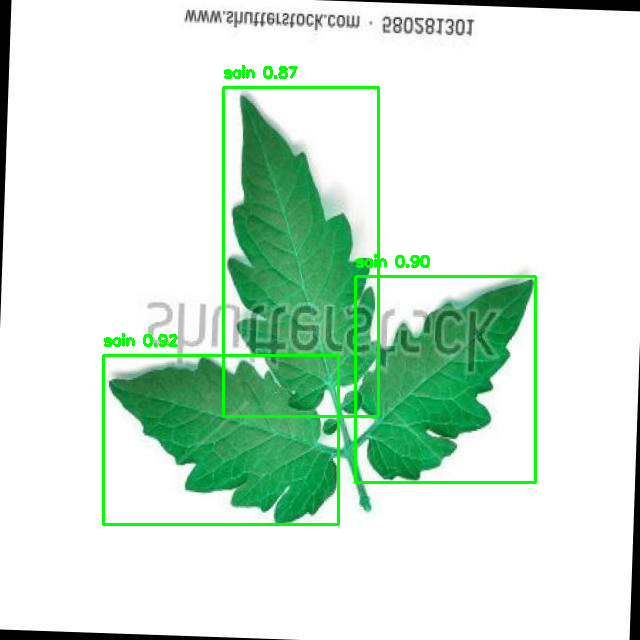

In [37]:
import torch
import cv2
import numpy as np
from PIL import Image as PILImage  # Rename PIL Image to avoid conflict with IPython
from IPython.display import display, Image
import io

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/runs/train/exp/weights/best.pt', force_reload=True)

# Load the test image
img_path = '/content/dataset/test/images/stock-photo-tomato-leaf-isolated-on-white-background-580281301_jpg.rf.58dafff3b3718b67b1359ed4df5f8251.jpg'  # Replace with your image path
img = PILImage.open(img_path)

# Convert the image to NumPy array for manipulation
img_np = np.array(img)

# Run inference
results = model(img)

# Extract detection results (bounding boxes, class names, and confidence scores)
detections = results.pandas().xyxy[0]  # Get bounding box coordinates and labels

# Iterate through detections and draw bounding boxes
for index, row in detections.iterrows():
    xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    label = f"{row['name']} {row['confidence']:.2f}"
    color = (0, 255, 0)  # Green color for bounding box

    # Draw rectangle and label on the image
    cv2.rectangle(img_np, (xmin, ymin), (xmax, ymax), color, 2)
    cv2.putText(img_np, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Convert the image from BGR (OpenCV) to RGB (PIL Image format)
img_with_boxes_rgb = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

# Convert image to bytes and display using IPython without saving to disk
img_byte_arr = io.BytesIO()
PILImage.fromarray(img_with_boxes_rgb).save(img_byte_arr, format='PNG')
img_byte_arr = img_byte_arr.getvalue()

# Display the image inline in the notebook using IPython display
display(Image(data=img_byte_arr))